In [264]:
import pandas as pd
import numpy as np

In [265]:
multi_index = pd.read_csv('multifam.csv')

In [266]:
index_fl = multi_index.loc[multi_index['State']== 'FL']

In [267]:
columns = index_fl.columns
date_columns = []
other_columns = []
for column in columns:
    if '2' in column:
        date_columns.append(column)
    else:
        other_columns.append(column)
print(date_columns)
print(other_columns)

['2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'

In [268]:
fl = pd.melt(index_fl, id_vars = other_columns , value_vars = date_columns)
fl = fl.rename(columns={"variable": "Date", "value": "Rent_Index"})

In [269]:
fl['Date'] = pd.to_datetime(fl['Date'])

In [270]:
fl['Year'] = fl.Date.dt.year
fl['Yearly_Avg'] = fl.groupby([fl.Metro, fl.Year])['Rent_Index'].transform('mean')

In [271]:
fl.Metro.unique()

array(['Miami-Fort Lauderdale-West Palm Beach',
       'Orlando-Kissimmee-Sanford', 'Cape Coral-Fort Myers',
       'Jacksonville', 'North Port-Sarasota-Bradenton', 'Gainesville',
       'Tampa-St. Petersburg-Clearwater', 'Palm Bay-Melbourne-Titusville',
       'Naples-Immokalee-Marco Island', 'Tallahassee', 'Punta Gorda'],
      dtype=object)

In [272]:
fl.Metro.unique()
Metros_Used = ['Miami-Fort Lauderdale-West Palm Beach','Orlando-Kissimmee-Sanford', 'Tampa-St. Petersburg-Clearwater','Jacksonville']
fl = fl.loc[fl['Metro'].isin(Metros_Used)]

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Year', ylabel='Yearly_Avg'>

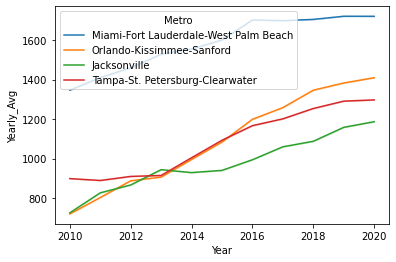

In [274]:
metro_graph = sns.lineplot(x="Year", y="Yearly_Avg",
             hue="Metro",
             data=fl)
metro_graph

In [275]:
fl.describe()

,RegionID,RegionName,SizeRank,Rent_Index,Year,Yearly_Avg
count,16385.000000,16385.000000,16385.000000,10723.000000,16385.000000,16385.000000
mean,74729.082759,33222.558621,902.744828,1388.216917,2014.867257,1335.655258
std,27072.818781,499.068635,503.985039,352.019565,2.731430,302.167495
min,71858.000000,32204.000000,72.000000,626.000000,2010.000000,719.687500
25%,72347.000000,33009.000000,411.000000,1127.000000,2013.000000,1083.791878
50%,72460.000000,33157.000000,905.000000,1375.000000,2015.000000,1409.640000
75%,72620.000000,33461.000000,1343.000000,1622.000000,2017.000000,1600.727145
max,399576.000000,34787.000000,1821.000000,2416.000000,2020.000000,1721.008895


<AxesSubplot:>

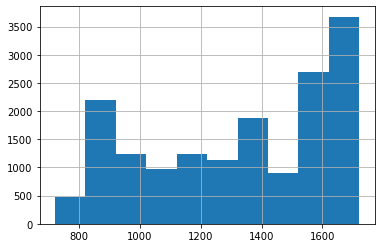

In [276]:
fl.Yearly_Avg.hist()

Year
2010    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2011    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2012    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2013    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2014    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2015    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2016    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2017    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2018    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2019    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2020    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

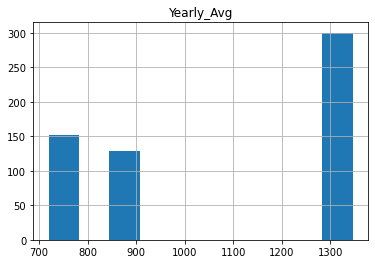

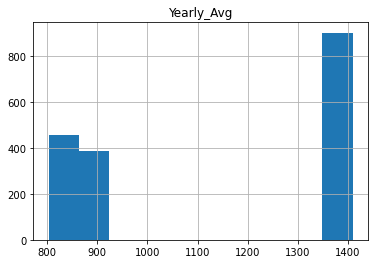

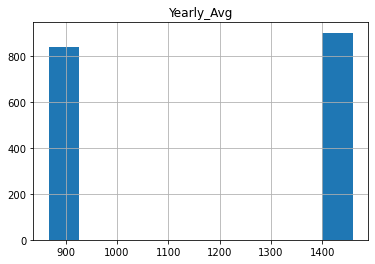

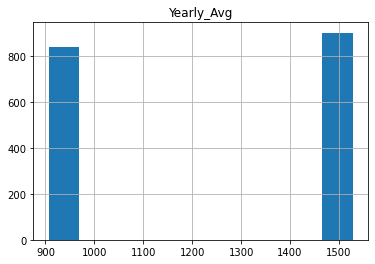

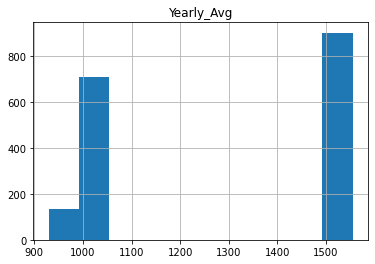

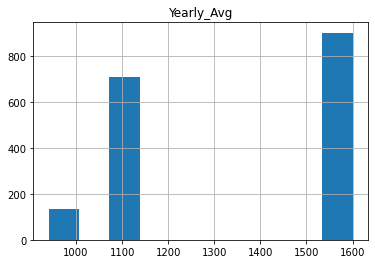

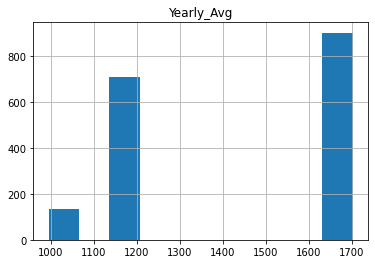

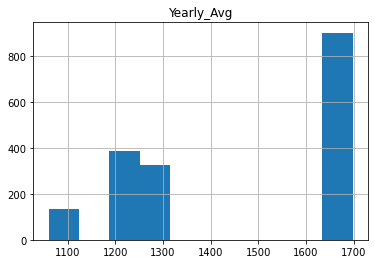

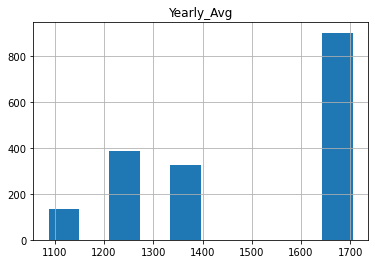

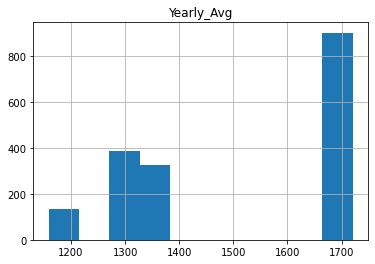

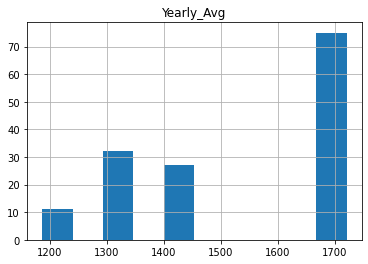

In [277]:
fl.groupby(['Year']).hist('Yearly_Avg')

In [278]:
fl = fl.rename(columns={'RegionName':'Zip'})
fl

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,Date,Rent_Index,Year,Yearly_Avg
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2010-09-01,1622.0,2010,1346.532110
1,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,2010-09-01,NaN,2010,719.687500
2,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2010-09-01,1106.0,2010,1346.532110
3,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2010-09-01,1388.0,2010,1346.532110
4,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2010-09-01,NaN,2010,1346.532110
...,...,...,...,...,...,...,...,...,...,...,...
19655,72534,33315,Fort Lauderdale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1753,2020-01-01,1443.0,2020,1720.764706
19656,72251,32827,Orlando,FL,Orlando-Kissimmee-Sanford,Orange County,1754,2020-01-01,1544.0,2020,1409.640000
19657,72580,33413,Greenacres,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,1783,2020-01-01,1459.0,2020,1720.764706
19658,72449,33146,Coral Gables,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1803,2020-01-01,2373.0,2020,1720.764706


In [279]:
fl['Zip'].unique()

array([33160, 34787, 33025, 33139, 33024, 32256, 34711, 33009, 32822,
       33186, 33064, 33027, 33311, 33313, 32828, 32225, 32246, 33157,
       32765, 32792, 33511, 33578, 33458, 32825, 33414, 32771, 33433,
       33436, 33141, 33324, 33178, 33021, 32839, 33308, 34698, 33418,
       33312, 33065, 33033, 33020, 33125, 32837, 33615, 32216, 33617,
       33142, 33062, 33612, 32703, 33180, 33130, 33179, 33068, 32835,
       33126, 32224, 33161, 33435, 33134, 33196, 33461, 33445, 32714,
       33131, 33172, 32207, 33401, 33771, 32811, 33611, 33133, 33702,
       33604, 33613, 33147, 32209, 33707, 33135, 33010, 33060, 33756,
       32812, 32250, 32205, 33140, 33764, 33404, 34683, 33137, 33143,
       34684, 33334, 33705, 33432, 32810, 33460, 33156, 33138, 32807,
       33407, 33626, 32817, 32806, 33304, 32821, 33701, 33607, 33712,
       34747, 33510, 33755, 33145, 32701, 33314, 32803, 33301, 32801,
       33706, 33708, 33066, 33716, 33602, 33444, 33127, 33150, 32751,
       33606, 33154,

In [280]:
miami = fl.loc[fl['Metro'] == 'Miami-Fort Lauderdale-West Palm Beach']
miami['Zip'].unique()

array([33160, 33025, 33139, 33024, 33009, 33186, 33064, 33027, 33311,
       33313, 33157, 33458, 33414, 33433, 33436, 33141, 33324, 33178,
       33021, 33308, 33418, 33312, 33065, 33033, 33020, 33125, 33142,
       33062, 33180, 33130, 33179, 33068, 33126, 33161, 33435, 33134,
       33196, 33461, 33445, 33131, 33172, 33401, 33133, 33147, 33135,
       33010, 33060, 33140, 33404, 33137, 33143, 33334, 33432, 33460,
       33156, 33138, 33407, 33304, 33145, 33314, 33301, 33066, 33444,
       33127, 33150, 33154, 33132, 33483, 33004, 33323, 33316, 33305,
       33315, 33413, 33146])

In [281]:
fl_unemployment = pd.read_csv('unemployment.csv')

In [282]:
fl_unemployment

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2010,10.9,10.9,10.9,10.9,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.7,NaN
1,2011,10.6,10.5,10.4,10.3,10.2,10.1,10.0,9.9,9.7,9.6,9.4,9.3,NaN
2,2012,9.2,9.1,9.0,8.9,8.9,8.8,8.6,8.5,8.4,8.3,8.2,8.1,NaN
3,2013,8.0,8.0,7.9,7.8,7.6,7.6,7.5,7.4,7.3,7.2,7.1,7.0,NaN
4,2014,6.9,6.8,6.7,6.7,6.6,6.5,6.4,6.3,6.2,6.1,6.0,6.0,NaN
5,2015,5.9,5.8,5.8,5.7,5.7,5.6,5.5,5.4,5.3,5.3,5.2,5.1,NaN
6,2016,5.1,5.0,5.0,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.8,4.8,NaN
7,2017,4.7,4.5,4.4,4.3,4.3,4.2,4.2,4.2,4.1,4.1,4.0,4.0,NaN
8,2018,3.9,3.9,3.8,3.7,3.6,3.6,3.5,3.5,3.5,3.5,3.5,3.5,NaN
9,2019,3.5,3.4,3.4,3.3,3.3,3.2,3.3,3.3,3.2,3.2,3.2,3.2,NaN


In [283]:
fl['Year'].dtypes

dtype('int64')

In [284]:
fl_unemployment['Year'].dtypes

dtype('int64')

In [287]:
fl_unemployment['Annual'] = fl_unemployment.iloc[:, 1:13].mean(axis=1)

In [288]:
fl_unemployment_yearly = fl_unemployment[['Year', 'Annual']]
fl_unemployment_yearly = fl_unemployment_yearly.rename(columns = {'Annual': 'Yearly_Unemployment'})

In [289]:
fl_unemployment_yearly #**** TO BE ADDED TO FL

,Year,Yearly_Unemployment
0,2010,10.825000
1,2011,10.000000
2,2012,8.666667
3,2013,7.533333
4,2014,6.433333
5,2015,5.525000
6,2016,4.916667
7,2017,4.250000
8,2018,3.625000
9,2019,3.291667


In [290]:
fl_employment = pd.read_csv('nonfarm.csv')

In [291]:
fl_employment['Yearly_Nonfarm_Employment'] = fl_employment.iloc[:, 1:13].mean(axis=1)
fl_employment_yearly = fl_employment[['Year', 'Yearly_Nonfarm_Employment']]

In [292]:
bls = fl_unemployment_yearly.merge(fl_employment_yearly, on= 'Year')

In [293]:
bls

,Year,Yearly_Unemployment,Yearly_Nonfarm_Employment
0,2010,10.825000,7175.108333
1,2011,10.000000,7255.075000
2,2012,8.666667,7399.200000
3,2013,7.533333,7585.275000
4,2014,6.433333,7827.050000
5,2015,5.525000,8110.666667
6,2016,4.916667,8387.658333
7,2017,4.250000,8570.650000
8,2018,3.625000,8782.808333
9,2019,3.291667,8966.341667


In [294]:
fl = fl.rename(columns={'Yearly_Avg': 'Yearly_Avg_Metro'})
fl['Yearly_Avg_Zip'] = fl.groupby([fl.Zip, fl.Year])['Rent_Index'].transform('mean')
fl

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,Date,Rent_Index,Year,Yearly_Avg_Metro,Yearly_Avg_Zip
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2010-09-01,1622.0,2010,1346.532110,1640.0
1,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,2010-09-01,NaN,2010,719.687500,NaN
2,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2010-09-01,1106.0,2010,1346.532110,1128.5
3,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2010-09-01,1388.0,2010,1346.532110,1437.0
4,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2010-09-01,NaN,2010,1346.532110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19655,72534,33315,Fort Lauderdale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1753,2020-01-01,1443.0,2020,1720.764706,1443.0
19656,72251,32827,Orlando,FL,Orlando-Kissimmee-Sanford,Orange County,1754,2020-01-01,1544.0,2020,1409.640000,1544.0
19657,72580,33413,Greenacres,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,1783,2020-01-01,1459.0,2020,1720.764706,1459.0
19658,72449,33146,Coral Gables,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1803,2020-01-01,2373.0,2020,1720.764706,2373.0


In [295]:
total_yearly = fl.merge(bls, on='Year')

In [296]:
total_yearly= total_yearly.drop('Date', axis=1)

In [297]:
zip_yearly = total_yearly.dropna(axis=0)

In [298]:
zip_yearly = zip_yearly[['Zip','Yearly_Avg_Zip','Yearly_Unemployment', 'Yearly_Nonfarm_Employment', 'Year']]

In [299]:
zip_yearly['Encoded_Zip'] = zip_yearly['Zip']

In [300]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [301]:
zip_yearly['Encoded_Zip'] = le.fit_transform(zip_yearly['Encoded_Zip'])

In [302]:
zip_yearly.corr(method='pearson')

,Zip,Yearly_Avg_Zip,Yearly_Unemployment,Yearly_Nonfarm_Employment,Year,Encoded_Zip
Zip,1.000000,-0.010875,0.045431,-0.036045,-0.033426,0.924903
Yearly_Avg_Zip,-0.010875,1.000000,-0.330274,0.343729,0.341978,-0.038779
Yearly_Unemployment,0.045431,-0.330274,1.000000,-0.961863,-0.932704,0.026937
Yearly_Nonfarm_Employment,-0.036045,0.343729,-0.961863,1.000000,0.986637,-0.020398
Year,-0.033426,0.341978,-0.932704,0.986637,1.000000,-0.018423
Encoded_Zip,0.924903,-0.038779,0.026937,-0.020398,-0.018423,1.000000


In [303]:
zip_yearly_features = zip_yearly.drop(['Zip', 'Yearly_Avg_Zip'], axis=1)
zip_yearly_target = zip_yearly['Yearly_Avg_Zip']
zip_yearly_features = zip_yearly_features.drop('Yearly_Nonfarm_Employment', axis=1)

In [304]:
acs = pd.read_csv('acs.csv')

In [305]:
zip_yearly = zip_yearly.rename(columns= {'Zip': 'zip_code', 'Year': 'year'})
zip_yearly = zip_yearly.drop('Yearly_Nonfarm_Employment', axis=1)

In [307]:
total_df = zip_yearly.merge(acs, on=['zip_code', 'year'])
total_df.head()

,zip_code,Yearly_Avg_Zip,Yearly_Unemployment,year,Encoded_Zip,Unnamed: 0,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree

In [308]:
total_df = total_df.rename(columns={'Yearly_Unemployment': 'FL_Unemployment'})

In [309]:
total_df = total_df.drop('Unnamed: 0', axis=1)

In [310]:
fls = pd.read_csv('FLSTHPI.csv')

In [311]:
fls['DATE'] = pd.to_datetime(fls['DATE'])

In [312]:
fls['year'] = fls.DATE.dt.year

In [313]:
fls

,DATE,FLSTHPI,year
0,1975-01-01,65.87,1975
1,1975-04-01,83.05,1975
2,1975-07-01,66.71,1975
3,1975-10-01,68.08,1975
4,1976-01-01,67.85,1976
...,...,...,...
182,2020-07-01,501.71,2020
183,2020-10-01,514.58,2020
184,2021-01-01,530.18,2021
185,2021-04-01,563.44,2021


In [314]:
fls['FLSTHPI_Yearly_Avg'] = fls.groupby(fls.year)['FLSTHPI'].transform('mean')

In [315]:
fls_yr_avg = fls.drop(['DATE', 'FLSTHPI'], axis=1)


In [316]:
total_df = total_df.merge(fls_yr_avg, on= 'year')

In [317]:
pd.set_option('max_columns', None)
total_df = total_df.drop_duplicates()

In [318]:
total_df.head()

,zip_code,Yearly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_a

In [319]:
total_col = total_df.columns

In [320]:
total_col

Index(['zip_code', 'Yearly_Avg_Zip', 'FL_Unemployment', 'year', 'Encoded_Zip',
       'total_pop', 'households', 'male_pop', 'female_pop', 'median_age',
       ...
       'occupation_sales_office', 'occupation_services',
       'management_business_sci_arts_employed', 'sales_office_employed',
       'in_grades_1_to_4', 'in_grades_5_to_8', 'in_grades_9_to_12',
       'in_school', 'in_undergrad_college', 'FLSTHPI_Yearly_Avg'],
      dtype='object', length=234)

In [321]:
race = []
other = []
for col in total_col:
    if 'white' in col:
        race.append(col)
    elif 'asian' in col:
        race.append(col)
    elif 'black' in col:
        race.append(col)
    elif 'indian' in col:
        race.append(col)
    elif 'hispanic' in col:
        race.append(col)
    else:
        other.append(col)
race

['white_pop',
 'black_pop',
 'asian_pop',
 'hispanic_pop',
 'amerindian_pop',
 'hispanic_any_race',
 'not_hispanic_pop',
 'asian_male_45_54',
 'asian_male_55_64',
 'black_male_45_54',
 'black_male_55_64',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'white_male_45_54',
 'white_male_55_64']

In [322]:
total_df = total_df.drop(race, axis=1)

In [323]:
total_df.isna().sum()
total_df = total_df.drop(['speak_only_english_at_home', 'speak_spanish_at_home', 'speak_spanish_at_home_low_english'], axis=1)

KeyError: "['speak_only_english_at_home' 'speak_spanish_at_home'\n 'speak_spanish_at_home_low_english'] not found in axis"

In [324]:
total_df.isna().sum()
total_df = total_df.drop('pop_5_years_over', axis=1)

KeyError: "['pop_5_years_over'] not found in axis"

In [325]:
total_df.isna().sum()

zip_code                0
Yearly_Avg_Zip          0
FL_Unemployment         0
year                    0
Encoded_Zip             0
                       ..
in_grades_5_to_8        0
in_grades_9_to_12       0
in_school               0
in_undergrad_college    0
FLSTHPI_Yearly_Avg      0
Length: 219, dtype: int64

In [337]:
total_df.to_csv('total_df.csv', index=False)

In [327]:
target = total_df['Yearly_Avg_Zip']
features = total_df.drop('Yearly_Avg_Zip', axis=1)

In [336]:
total_df = total_df.rename(columns={'Yearly_Avg_Zip': 'Monthly_Avg_Zip'})

In [328]:
def forward_selection(data, target, significance_level=0.05):
    import statsmodels.api as sm
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [329]:
forward_selected_features=forward_selection(features, target, significance_level=0.05)

<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

<ipython-input-328-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


In [330]:
forward_selected_features

['median_rent',
 'commuters_by_public_transportation',
 'median_year_structure_built',
 'owner_occupied_housing_units_upper_value_quartile',
 'median_income',
 'male_45_64_less_than_9_grade',
 'different_house_year_ago_same_city',
 'vacant_housing_units_for_rent',
 'graduate_professional_degree',
 'different_house_year_ago_different_city',
 'income_per_capita',
 'male_45_64_associates_degree',
 'dwellings_1_units_attached',
 'male_35_to_39',
 'in_undergrad_college',
 'employed_public_administration',
 'mortgaged_housing_units',
 'female_75_to_79',
 'rent_15_to_20_percent',
 'employed_science_management_admin_waste',
 'armed_forces',
 'less_one_year_college',
 'civilian_labor_force',
 'pop_in_labor_force',
 'income_100000_124999',
 'income_50000_59999',
 'rent_over_50_percent',
 'commuters_16_over',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'commute_less_10_mins',
 'dwellings_20_to_49_units',
 'male_75_to_79',
 'employed_manufacturing',
 'rent_burden_not_comput

In [331]:
features_final = pd.DataFrame()
for feature in forward_selected_features:
    features_final[feature]=features[feature]
features_final['year'] = features['year']
features_final

,median_rent,commuters_by_public_transportation,median_year_structure_built,owner_occupied_housing_units_upper_value_quartile,median_income,male_45_64_less_than_9_grade,different_house_year_ago_same_city,vacant_housing_units_for_rent,graduate_professional_degree,different_house_year_ago_different_city,income_per_capita,male_45_64_associates_degree,dwellings_1_units_attached,male_35_to_39,in_undergrad_college,employed_public_administration,mortgaged_housing_units,female_75_to_79,rent_15_to_20_percent,employed_science_management_admin_waste,armed_forces,less_one_year_college,civilian_labor_force,pop_in_labor_force,income_100000_124999,income_50000_59999,rent_over_50_percent,commuters_16_over,two_parents_mother_in_labor_force_families_with_young_children,commute_less_10_mins,dwellings_20_to_49_units,male_75_to_79,employed_manufacturing,rent_burden_not_computed,pop_25_64,median_age,male_30_to_34,dwellings_5_to_9_units,mobile_homes,commuters_by_subway_or_elevated,male_45_64_grade_9_12,commute_45_59_mins,commute_35_44_mins,pop_16_over,not_in_labor_force,female_60_to_61,income_20000_24999,income_40000_44999,one_car,income_125000_149999,male_67_to_69,income_75000_99999,group_quarters,renter_occupied_housing_units_paying_cash_median_gross_rent,male_15_to_17,nonfamily_households,income_150000_199999,percent_income_spent_on_rent,male_45_to_49,masters_degree,male_20,children_in_single_female_hh,workers_16_and_over,worked_at_home,employed_education_health_social,female_65_to_66,year
0,1258.0,614.0,1978.0,482700.0,45627.0,117,920.0,1203,6260.0,3473.0,45536.0,477,950,1120,2019,517.0,5971,773,688.0,3224.0,54.0,1745,18733.0,18787.0,1089.0,1313.0,1940.0,15596.0,34.0,1161.0,1950,917,658.0,635.0,20112.0,49.6,1159,140,108,0.0,135,2123.0,2971.0,33208.0,14421.0,611,1241.0,959.0,10685.0,765.0,566,1749.0,124,1332.0,415,9785,604.0,34.0,1384,3808,118,1118,17097.0,1501.0,2975.0,571,2013
48,1209.0,557.0,1992.0,229600.0,51822.0,199,2774.0,1400,3863.0,7735.0,23660.0,530,3745,2500,4987,1363.0,8442,675,881.0,3195.0,68.0,1928,32908.0,32976.0,1349.0,1879.0,3162.0,27954.0,36.0,1477.0,4875,300,1352.0,312.0,32621.0,32.9,2985,2142,653,0.0,138,3515.0,2947.0,44597.0,11621.0,489,997.0,1540.0,10195.0,1036.0,408,3334.0,622,1384.0,1267,7610,597.0,36.7,1736,2774,519,5409,28533.0,579.0,8170.0,309,2013
96,1036.0,1746.0,1968.0,568800.0,46612.0,103,4280.0,1694,6690.0,4319.0,47650.0,411,285,2639,1906,498.0,4096,631,1531.0,3598.0,166.0,1148,25067.0,25233.0,1661.0,1529.0,3862.0,21486.0,89.0,3325.0,6115,511,562.0,756.0,25764.0,38.1,2368,2288,231,81.0,351,749.0,1317.0,34270.0,9037.0,300,1042.0,777.0,10526.0,778.0,300,1804.0,714,1124.0,121,14849,918.0,31.8,1936,4013,231,823,23593.0,2107.0,3090.0,227,2013
144,862.0,167.0,1991.0,391600.0,54160.0,13,5643.0,816,5157.0,4513.0,35244.0,327,1471,1160,3429,712.0,5470,413,1587.0,3672.0,246.0,1685,23574.0,23820.0,1328.0,1623.0,2190.0,20518.0,46.0,2240.0,2921,335,744.0,448.0,23149.0,32.7,2101,2964,286,0.0,44,473.0,518.0,33258.0,9438.0,321,643.0,1229.0,8424.0,631.0,281,1932.0,138,1020.0,591,8750,1108.0,28.7,1116,3420,238,1892,21640.0,1122.0,4540.0,414,2013
192,942.0,941.0,1973.0,224100.0,33157.0,340,2320.0,610,3185.0,4930.0,24587.0,357,1062,1535,1885,382.0,4941,820,423.0,1956.0,46.0,1541,19202.0,19248.0,727.0,1250.0,2575.0,15448.0,51.0,929.0,3970,864,541.0,739.0,21553.0,47.1,1168,592,2614,0.0,438,1389.0,1629.0,34702.0,15454.0,752,1437.0,984.0,11288.0,596.0,682,1556.0,142,1060.0,413,9403,318.0,39.3,1303,1914,276,2258,16133.0,685.0,2593.0,809,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,1305.0,257.0,2001.0,331400.0,70619.0,192,2299.0,356,6585.0,7675.0,29831.0,636,2424,2565,5829,1254.0,10240,821,773.0,5382.0,41.0,2112,35293.0,35334.0,2368.0,1385.0,2389.0,29695.0,325.0,1481.0,962,298,2046.0,494.0,35095.0,34.0,1893,

In [377]:
fls = fls.rename(columns={'DATE':'Date'})
fls = fls.drop(['year', 'FLSTHPI_Yearly_Avg'],axis=1)
fls.head()

,Date,FLSTHPI
0,1975-01-01,65.87
1,1975-04-01,83.05
2,1975-07-01,66.71
3,1975-10-01,68.08
4,1976-01-01,67.85


In [346]:
acs = acs.drop('Unnamed: 0', axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

In [372]:
#changing year to release date of feb of next year
acs_fl = acs.loc[acs['zip_code'].isin(total_df['zip_code'])]
acs_fl['year'] = acs_fl['year'] + 1
acs_fl['month'] = 2
acs_fl['release'] =pd.to_datetime(acs_fl[['year', 'month']].assign(DAY=1))
acs_fl['acs_date'] = acs_fl['release']
acs_fl = acs_fl.drop(['month', 'release'], axis=1)
acs_fl.head()

<ipython-input-372-f46d225fcfab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_fl['year'] = acs_fl['year'] + 1
<ipython-input-372-f46d225fcfab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_fl['month'] = 2
<ipython-input-372-f46d225fcfab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,male_45_64_associates_degree,male_45

In [373]:
fl.head()

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,Date,Rent_Index,Year,Yearly_Avg_Metro,Yearly_Avg_Zip
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2010-09-01,1622.0,2010,1346.53211,1640.0
1,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,2010-09-01,NaN,2010,719.68750,NaN
2,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2010-09-01,1106.0,2010,1346.53211,1128.5
3,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2010-09-01,1388.0,2010,1346.53211,1437.0
4,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2010-09-01,NaN,2010,1346.53211,NaN


In [374]:
fl.Year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [375]:
acs_fl = acs_fl.rename(columns={'zip_code': 'Zip'})

In [378]:
fl = fl.merge(fls, on='Date')

In [411]:
release_dates = acs_fl.acs_date.unique()
release_dates.sort()
print(release_dates)
for ob in release_dates:
    print(type(ob))

['2014-02-01T00:00:00.000000000' '2015-02-01T00:00:00.000000000'
 '2016-02-01T00:00:00.000000000' '2017-02-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000']
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>


In [415]:
#def get_date(row):
 #       if row['Date'] <= '2-1-2014' and row['Date'] > '2-1-2015':
  #          return '2-1-2014'
   #     elif row['Date'] <= '2-1-2015' and row['Date'] > '2-1-2016':
    #        return '2-1-2015'
     #   elif row['Date'] <= '2-1-2016' and row['Date'] > '2-1-2017':
      #      return 2-1-2016
       # elif row['Date'] <= '2-1-2017' and row['Date'] > '2-1-2018':
        #    return '2-1-2017'
        #elif row['Date'] <= '2-1-2018' and row['Date'] > '2-1-2019':
         #   return '2-1-2018'
        #else:
         #   return '2-1-2019'

In [416]:
#fl = fl.loc[fl['Date'] > '1-1-2013']

In [417]:
#fl['acs_date'] = fl.apply(get_date,axis=1)

TypeError: '<=' not supported between instances of 'Timestamp' and 'str'

In [420]:
acs_fl = acs_fl.rename(columns={'year': 'Year'})

In [421]:
monthly_df = fl.merge(acs_fl, on=['Year','Zip'])

In [426]:
monthly_df = monthly_df.drop(['RegionID', 'SizeRank','acs_date'], axis=1)

KeyError: "['RegionID' 'SizeRank'] not found in axis"

In [428]:
monthly_df= monthly_df.drop('acs_date', axis=1)
monthly_df.head()

,Zip,City,State,Metro,CountyName,Date,Rent_Index,Year,Yearly_Avg_Metro,Yearly_Avg_Zip,FLSTHPI,acs_release,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_2

In [432]:
monthly_df.drop(['Yearly_Avg_Metro','Yearly_Avg_Zip'], axis=1)

,Zip,City,State,Metro,CountyName,Date,Rent_Index,Year,FLSTHPI,acs_release,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degre

In [433]:
monthly_df.to_csv('monthly_df.csv')

In [74]:
!pip install prophet
from prophet import Prophet

     |████████████████████████████████| 65 kB 964 kB/s eta 0:00:011
     |████████████████████████████████| 49 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 62.6 MB 190 kB/s  eta 0:00:01     |████████████████████████████▊   | 56.1 MB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 11.2 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /home/jacquizz/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-9kwf90do/prophet_d4eb0ee825e94f24ace37aca236900d3/setup.py'"'"'; __file__='"'"'/tmp/pip-install-9kwf90do/prophet_d4eb0ee825e94f24ace37aca236900d3/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(

In [332]:
prft = total_df[['year', 'zip_code', 'Yearly_Avg_Zip']]

In [335]:
!pip install fbprophet
import fbprophet

     |████████████████████████████████| 64 kB 1.5 MB/s eta 0:00:011
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=694120 sha256=f2d3979bf8f2a1adfeb3220873c30b74957e9bd715a4c84f52704ecc8becf6db
  Stored in directory: /home/jacquizz/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.
